In [ ]:
!pip install pycaret

In [1]:
import pycaret

In [2]:
import pandas as pd
df = pd.read_csv('../data/creditcard.csv')
df.shape

(284807, 31)

In [3]:
data_unseen = df.sample(frac=0.1, random_state=42)      # Sample 10% of the data to become the unseen test set
df = df.drop(data_unseen.index)                       # Use the remaining 90% as the training (& validation) data

df.reset_index(drop=True, inplace=True)

data_seen = df.sample(frac=0.1, random_state=42)      # Sample 10% of the data to become the unseen test set
df = df.drop(data_seen.index)                       # Use the remaining 90% as the training (& validation) data

df.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
data_seen.reset_index(drop=True, inplace=True)

print('Data for Model Training & Validation: ' + str(data_seen.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Model Training & Validation: (25633, 31)
Unseen Data For Predictions: (28481, 31)


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
2,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [5]:
from pycaret.classification import *

In [9]:
expt_intermediate = setup(
    data = data_seen, 
    target = 'Class', 
    session_id=42,                      # Random seed to ensure reproducibility of the experiment with the same data
    train_size=0.8,                     # 80% training data & 20% held-out validation data
    normalize=True,
    normalize_method="minmax",
    polynomial_features=True,
    trigonometry_features=True,
    fix_imbalance=True,
    feature_selection=True,
    use_gpu=True
)

,Description,Value
0,session_id,42
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(25633, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [23]:
all_metrics = get_metrics()
all_metrics

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7f3c5e841c20>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<function roc_auc_score at 0x7f3c5e82ec20>,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=macro)",pred,{'average': 'macro'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7f3c5e845170>,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7f3c5e8454d0>,make_scorer(matthews_corrcoef),pred,{},True,True,False


In [11]:
best = compare_models(sort="F1", exclude=['svm','ridge','nb'], fold=5, n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9992,0.9862,0.6607,0.8617,0.7410,0.7406,0.7506,2.114
ada,Ada Boost Classifier,0.9990,0.9834,0.6929,0.7514,0.7150,0.7145,0.7181,11.904
rf,Random Forest Classifier,0.9992,0.9864,0.5750,0.9000,0.6860,0.6856,0.7105,12.192
gbc,Gradient Boosting Classifier,0.9986,0.9984,0.8036,0.6035,0.6779,0.6773,0.6898,61.376
knn,K Neighbors Classifier,0.9980,0.9011,0.7464,0.4586,0.5670,0.5660,0.5836,6.264
lightgbm,Light Gradient Boosting Machine,0.9984,0.9857,0.6036,0.5533,0.5567,0.5559,0.5667,1.326
dt,Decision Tree Classifier,0.9983,0.7745,0.5500,0.5050,0.5228,0.5220,0.5243,2.372
lr,Logistic Regression,0.9938,0.9980,0.9464,0.2228,0.3565,0.3547,0.4536,0.870
lda,Linear Discriminant Analysis,0.9904,0.9915,0.9464,0.1515,0.2608,0.2586,0.3760,0.394
qda,Quadratic Discriminant Analysis,0.9982,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.220


In [12]:
et = best[0]
tuned_et = tune_model(et, fold=5, optimize="F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9983,0.9927,0.8750,0.5385,0.6667,0.6659,0.6857
1,0.9990,0.9999,1.0000,0.6364,0.7778,0.7773,0.7973
2,0.9990,0.9997,0.8571,0.6667,0.7500,0.7495,0.7555
3,0.9988,0.9984,0.7143,0.6250,0.6667,0.6661,0.6675
4,0.9995,0.9998,1.0000,0.7778,0.8750,0.8748,0.8817
Mean,0.9989,0.9981,0.8893,0.6489,0.7472,0.7467,0.7575
SD,0.0004,0.0028,0.1062,0.0773,0.0778,0.0780,0.0778


In [13]:
ada = best[1]
tuned_ada = tune_model(ada, fold=5, optimize="F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9980,0.9800,0.8750,0.5000,0.6364,0.6355,0.6606
1,0.9966,0.9987,0.5714,0.2667,0.3636,0.3622,0.3889
2,0.9971,0.9963,0.8571,0.3529,0.5000,0.4988,0.5490
3,0.9985,0.9986,0.7143,0.5556,0.6250,0.6243,0.6292
4,0.9988,0.9997,1.0000,0.5833,0.7368,0.7363,0.7633
Mean,0.9978,0.9947,0.8036,0.4517,0.5724,0.5714,0.5982
SD,0.0008,0.0074,0.1473,0.1220,0.1286,0.1289,0.1252


In [14]:
rf = best[2]
tuned_rf = tune_model(rf, fold=5, optimize="F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9993,0.9943,0.8750,0.7778,0.8235,0.8232,0.8246
1,0.9998,1.0000,0.8571,1.0000,0.9231,0.9230,0.9257
2,0.9998,0.9995,0.8571,1.0000,0.9231,0.9230,0.9257
3,0.9993,0.9990,0.7143,0.8333,0.7692,0.7689,0.7712
4,0.9993,0.9997,0.8571,0.7500,0.8000,0.7996,0.8014
Mean,0.9995,0.9985,0.8321,0.8722,0.8478,0.8475,0.8497
SD,0.0002,0.0021,0.0593,0.1077,0.0638,0.0640,0.0643


In [16]:
gbc = best[3]
tuned_gbc = tune_model(gbc, fold=5, optimize="F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9993,0.9972,0.8750,0.7778,0.8235,0.8232,0.8246
1,0.9990,0.9976,0.7143,0.7143,0.7143,0.7138,0.7138
2,0.9993,0.9993,0.7143,0.8333,0.7692,0.7689,0.7712
3,0.9993,0.9997,0.7143,0.8333,0.7692,0.7689,0.7712
4,0.9998,0.9998,1.0000,0.8750,0.9333,0.9332,0.9353
Mean,0.9993,0.9987,0.8036,0.8067,0.8019,0.8016,0.8032
SD,0.0002,0.0011,0.1163,0.0556,0.0742,0.0743,0.0748


In [15]:
knn = best[4]
tuned_knn = tune_model(knn, fold=5, optimize="F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9985,0.9371,0.8750,0.5833,0.7000,0.6993,0.7138
1,0.9983,0.9995,0.8571,0.5000,0.6316,0.6308,0.6539
2,0.9983,0.9280,0.7143,0.5000,0.5882,0.5874,0.5968
3,0.9978,0.9277,0.5714,0.4000,0.4706,0.4695,0.4770
4,0.9990,0.9998,1.0000,0.6364,0.7778,0.7773,0.7973
Mean,0.9984,0.9584,0.8036,0.5239,0.6336,0.6329,0.6478
SD,0.0004,0.0338,0.1473,0.0808,0.1038,0.1040,0.1082


In [17]:
blended_model = blend_models(estimator_list=[tuned_et,tuned_ada,tuned_knn,tuned_rf,tuned_gbc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9985,0.9355,0.7500,0.6000,0.6667,0.6659,0.6701
1,0.9995,1.0000,1.0000,0.8000,0.8889,0.8886,0.8942
2,0.9995,0.9999,1.0000,0.8000,0.8889,0.8886,0.8942
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9990,0.9998,0.7500,0.7500,0.7500,0.7495,0.7495
5,0.9995,0.9991,0.7500,1.0000,0.8571,0.8569,0.8658
6,0.9990,0.9987,0.6667,0.6667,0.6667,0.6662,0.6662
7,0.9995,0.9993,0.6667,1.0000,0.8000,0.7998,0.8163
8,0.9995,0.9995,1.0000,0.7500,0.8571,0.8569,0.8658
9,0.9995,1.0000,1.0000,0.7500,0.8571,0.8569,0.8658


In [18]:
predict_model(blended_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9986,0.9925,0.7,0.6364,0.6667,0.666,0.6667


,V16,tan(V10),V12_Power2,V25_Power2,cos(V11),V2,V5,V10,V9_Power2,cos(V10),V11,V26,V23,V17,V22,V4_Power2,V3,V1,V27,cos(V6),sin(V28),cos(V17),V17_Power2,V19,sin(V16),tan(V19),V4,V28,cos(V4),V25,V10_Power2,V8,sin(V14),V18,V24,V12,V14_Power2,V20,Amount,V3_Power2,V11_Power2,tan(V11),V13,sin(V25),V9,V18_Power2,V6,Time,V7,V14,V21,sin(V22),V15,V16_Power2,Class,Label,Score
0,0.669625,0.123094,0.000281,0.000099,0.900883,0.816811,0.455369,0.493953,0.000570,0.975481,0.265364,0.342814,0.607004,0.764310,0.400755,0.000023,0.857501,0.897911,0.423506,0.706376,0.540237,0.963524,0.000422,0.509629,0.797986,0.670558,0.344174,0.469667,0.999330,0.380026,0.000588,0.769793,0.632267,0.648021,0.449629,0.785766,0.000360,0.595112,0.001023,0.000215,0.005435,0.006604,0.350165,0.475982,0.382557,0.000025,0.511267,0.403134,0.425447,0.708245,0.542305,0.126064,0.541176,0.002662,0,0,0.9494
1,0.664741,0.124105,0.000212,0.027483,0.954959,0.829081,0.498232,0.443307,0.022122,0.479603,0.349485,0.297081,0.585630,0.867237,0.441757,0.008859,0.814293,0.908917,0.404102,0.915179,0.455259,0.008516,0.024953,0.524002,0.758591,0.670586,0.403048,0.456751,0.762256,0.487902,0.015450,0.753446,0.778208,0.766604,0.248090,0.787540,0.069883,0.601278,0.000101,0.001329,0.002423,0.006606,0.620218,0.858817,0.307266,0.035693,0.525364,0.237493,0.451845,0.511321,0.544335,0.350258,0.592665,0.001929,0,0,0.8731
2,0.586578,0.123086,0.006948,0.000795,0.663506,0.795378,0.468455,0.487440,0.016720,0.943201,0.413263,0.273340,0.602923,0.773317,0.492221,0.017207,0.896008,0.905659,0.413945,0.989638,0.492050,0.909985,0.001060,0.636016,0.086007,0.670915,0.427463,0.462345,0.575297,0.403441,0.001378,0.764679,0.720704,0.619335,0.443823,0.865782,0.001049,0.598725,0.008902,0.003628,0.020290,0.006611,0.512710,0.567844,0.318982,0.001558,0.545582,0.482007,0.432798,0.717574,0.555081,0.676756,0.387789,0.006214,0,0,0.9486
3,0.638638,0.123070,0.014238,0.005330,0.552506,0.764469,0.445730,0.477544,0.239199,0.871010,0.200397,0.484948,0.605228,0.773127,0.496497,0.007234,0.870466,0.984554,0.413593,0.821730,0.480028,0.911339,0.001044,0.557637,0.518122,0.670654,0.397070,0.460519,0.802723,0.341320,0.003211,0.759008,0.555606,0.687273,0.312084,0.703810,0.000062,0.589412,0.007855,0.000901,0.028452,0.006589,0.632924,0.327386,0.691895,0.004342,0.562566,0.573319,0.394883,0.700550,0.547065,0.702835,0.225458,0.000009,0,0,0.9274
4,0.729566,0.123138,0.001958,0.014582,0.998532,0.766835,0.485696,0.531910,0.004562,0.895708,0.309768,0.315268,0.598728,0.730996,0.521702,0.027470,0.821242,0.973292,0.415284,0.038700,0.511087,0.950607,0.000574,0.593230,0.986535,0.670740,0.231803,0.465235,0.389465,0.460264,0.002573,0.771090,0.342123,0.603647,0.563206,0.763809,0.000518,0.599828,0.003407,0.000797,0.000078,0.006606,0.491712,0.775275,0.356229,0.004071,0.630363,0.378574,0.395462,0.679245,0.559838,0.840855,0.574767,0.021236,0,0,0.9511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,0.583680,0.122865,0.002898,0.006591,0.654102,0.797007,0.475941,0.451421,0.030594,0.583117,0.216784,0.162244,0.591761,0.741430,0.500229,0.041926,0.878738,0.916817,0.439534,0.995220,0.623926,0.991238,0.000100,0.525866,0.070882,0.670590,0.206090,0.482564,0.199327,0.435971,0.011723,0.754894,0.249905,0.596598,0.297459,0.842188,0.001377,0.595549,0.000228,0.001584,0.020946,0.006600,0.534194,0.690999,0.502439,0.005586,0.536875,0.392448,0.440904,0.669271,0.548901,0.725074,0.406764,0.006952,0,0,0.9469
5123,0.628796,0.123109,0.001091,0.003742,0.878764,0.783234,0.467791,0.508495,0.003946,0.999160,0.259795,0.368203,0.614052,0.738066,0.414193,0.001294,0.803087,0.990641,0.410316,0.734282,0.469479,0.981679,0.000210,0.538065,0.422803,0.670614,0.364731,0.458916,0.962575,0.348587,0.000020,0.747226,0.612608,0.549259,0.394137,0.825568,0.000259,0.587113,0.000113,0.002472,0.006701,0.006604,0.487039,0.354471,0.4

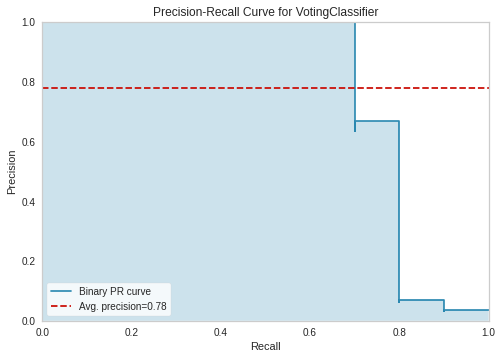

In [21]:
plot_model(blended_model, 'pr')

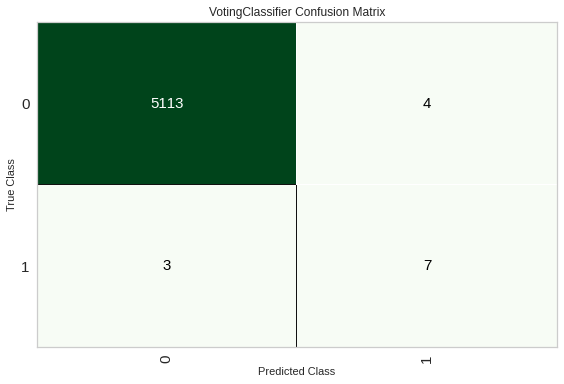

In [22]:
plot_model(blended_model, 'confusion_matrix')

In [19]:
unseen_predictions = predict_model(blended_model, data=data_unseen)
unseen_predictions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1,1,0.9011
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0,0,0.9706
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0,0,0.9692
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0,0,0.9486
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0,0,0.9641


In [26]:
from pycaret.utils import check_metric
print("Accuracy:\t", check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Accuracy'))
print("Precision:\t", check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Precision'))
print("Recall:\t", check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Recall'))
print("F1-Score:\t", check_metric(unseen_predictions.Class, unseen_predictions.Label, 'F1'))

Accuracy:	 0.9993
Precision:	 0.7358
Recall:	 0.8478
F1-Score:	 0.7879


In [28]:
save_model(blended_model, "../models/blended_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                                                           min_impurity_decrease=0,
                                                                           min_impurity_split=None,
                                                                          